In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('/content/BostonHousing.csv')
df.head(10)      # see top 10 of our data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df = pd.read_csv('/content/BostonHousing.csv')
df.tail(10)      # see last 10 of our data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [4]:
df.describe()         # get more information

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()        # count the null/missing value

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
correlation = df.corr()       # understamding the correlation between all values

<Axes: >

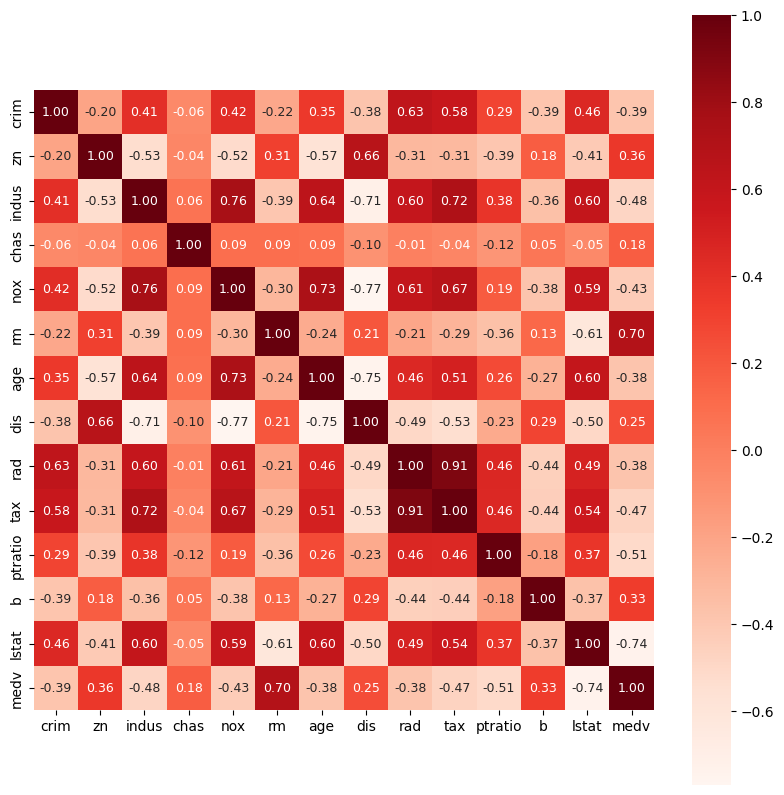

In [7]:
plt.figure(figsize=(10, 10))          # create a heat map to better analys data
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':9}, cmap='Reds')

In [8]:
x = df.drop(['medv'], axis=1)
y = df['medv']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)                # Dividing our data into train(80%) and test(20%)

In [10]:
classifier = XGBRegressor()              # loading the model
classifier.fit(x_train, y_train)              # training our model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [11]:
x_test_prediction = classifier.predict(x_test)
score_1 = metrics.r2_score(y_test, x_test_prediction)               # R squared error
score_2 = metrics.mean_absolute_error(y_test, x_test_prediction)             # mean absolute error
print(f'R squared error is: {score_1}')
print(f'mean absolute error is: {score_2}')

R squared error is: 0.9051721149855378
mean absolute error is: 2.0748727686264927


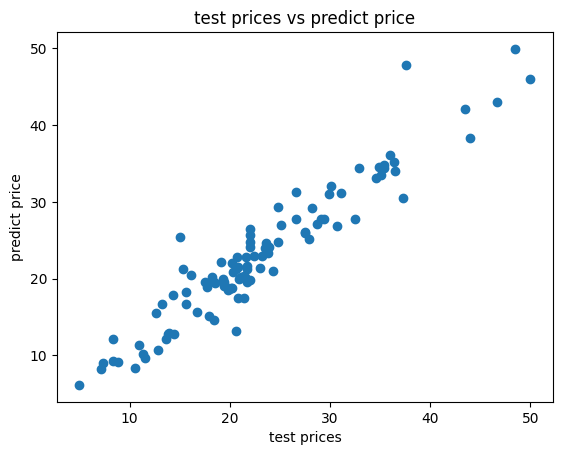

In [12]:
plt.scatter(y_test, x_test_prediction)
plt.xlabel('test prices')
plt.ylabel('predict price')
plt.title('test prices vs predict price')
plt.show()

In [13]:
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print('You have to just enter a number!!')

crim = get_float_input('Enter the crim: ')
zn = get_float_input('Enter the zn: ')
indus = get_float_input('Enter the indus: ')
chas = get_float_input('Enter the chas: ')
nox = get_float_input('Enter the nox: ')
rm = get_float_input('Enter the rm: ')
age = get_float_input('Enter the age: ')
dis = get_float_input('Enter the dis: ')
rad = get_float_input('Enter the rad: ')
tax = get_float_input('Enter the tax: ')
ptratio = get_float_input('Enter the ptratio: ')
b = get_float_input('Enter the b: ')
lstat = get_float_input('Enter the lstat:')

#   4.03841 , 0 , 18.1 , 0 , 0.532 , 6.229 , 90.7 , 3.0993 , 24 , 666 , 20.2 , 395.33 , 12.87 ,             19.64   the price of this house is 19.64 thousand dollors lets try it

client_information = (crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat)
client_information_array = np.asarray(client_information)                         # convert to array
client_information_array_reshape = client_information_array.reshape(1, -1)             # reshape our array
result = classifier.predict(client_information_array_reshape)
print(f'the predict price is {result} thousand $')

Enter the crim: 4
Enter the zn: 0
Enter the indus: 18
Enter the chas: 0
Enter the nox: 0.5
Enter the rm: 6.2
Enter the age: 91
Enter the dis: 3.1
Enter the rad: 24
Enter the tax: 666
Enter the ptratio: 20.2
Enter the b: 393.3
Enter the lstat:13
the predict price is [19.98184] thousand $
